# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


 PROJECT OUTLINE
1.Introduction
2.Business Understanding
Business problem
Objectives
Data Understanding
Data preparation
Data Loading
Data cleaning
Data Analysis
Exploratory Descriptive Analysis (EDA)
Translating data into visual context
Plotting of graphs.
Conclusion
Recommendations


PHASE 1 PROJECT : Microsoft Film Production Studio
PROJECT OVERVIEW
I will use exploratory data analysis to produce insights for a business stakeholder in this segment.

I'll expound more  through my research findings and how I covert them into useful information that stakeholders can use to guide their decision-making.



In [45]:
# Loading necessary libraries for my analysis
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [47]:
#loading the box office mojo file
movie_gross=pd.read_csv ('bom.movie_gross.csv')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [48]:
#loading movie_budgets file
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [49]:
#loading the imdb file
movie_info= pd.read_csv('tmdb.movies.csv')
movie_info

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [50]:
#loading movie info file
#to check if there is any relevant data 
movie_info= pd.read_table('rt.movie_info.tsv')
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [52]:
#Using the encode attribute to load a tsv file and display tab separated values
rt_reviews = pd.read_table('rt.reviews.tsv', encoding='unicode_escape') 
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [53]:
#Sqlite3 connection to the database for reading the files
conn = sqlite3.connect("im.db")
conn

In [54]:
#load the necessary data from the movie_ratings sql file
movie_ratings = pd.read_sql_query("""
SELECT *
FROM movie_ratings
LIMIT 10
;
""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [56]:
#load the data from the movie_basics
movie_basics = pd.read_sql_query("""
SELECT *
FROM movie_basics
;
""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [57]:
#load movie_akas to display relevant data needed.
movie_akas = pd.read_sql_query("""
SELECT *
FROM movie_akas
;
""", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [58]:
 #starting data cleaning from the first dataset
#cheecking for any erraneous data, null values or incomplete
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [60]:
#convert domestic_gross float to integer type
movie_gross['domestic_gross'] = movie_gross['domestic_gross']

In [61]:
#confirm the conversion
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [65]:
#convert domestic_gross float type to string type
movie_gross['domestic_gross'].astype(str)

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: object

In [66]:
#check for any null values
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [67]:
#checked for null values
#null values were found to be 1350 on foreign_gross column, 5 on studio
#Considering that they will be needed later, I have chosen to drop. 
#drop all null values in the datasets
movie_gross.dropna()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [68]:
#checking for any null values to clean 
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [69]:
#calling movie_budgets for cleaning
#checking for any null values
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [70]:
#In the columns production budget, domestic gross, and worldwide gross,for movie_budgets dataframe replacing $ and , data to integers.
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$','')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',','')

movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$','')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',','')

movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$','')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',','')

movie_budgets

C:\Users\USER\AppData\Local\Temp\ipykernel_11044\82131240.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$','')
C:\Users\USER\AppData\Local\Temp\ipykernel_11044\82131240.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$','')
C:\Users\USER\AppData\Local\Temp\ipykernel_11044\82131240.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['wor

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [71]:
#calling the next dataset, movie_info
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [72]:
#show all null values in the datasets
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [73]:
#The movie info dataset contains an excessive number of null values.
#synopsis 62,rating 3,genre8,director 199,writer 449,theater_date 359,dvd_date 359,currency 1220,box_office 1220,runtime 30,studio 1066

movie_info.dropna()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment


In [74]:
#cleaning data in rt_reviews
#call rt_reviews
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [75]:
#checking for the sum of null values in this dataset
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [76]:
#rt_reviews has too many null values
#review has 5563, rating 13517, critic 2722 and publisher has 309 null values
# drop all null values

rt_reviews.dropna()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


In [77]:
#checking for any NaN values
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [78]:
#checking for any null values
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [79]:
#checking for null values
movie_akas.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [80]:
#eraaneous null values have been found in movie_akas
#replacing null values with 0
movie_akas.fillna(0, inplace= True)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,0,0,0.0
1,tt0369610,11,Jurashikku warudo,JP,0,imdbDisplay,0,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0,imdbDisplay,0,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,0,0,short title,0.0
4,tt0369610,14,Jurassic World,FR,0,imdbDisplay,0,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,0,0,original,0,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,0,0.0
331700,tt9880178,1,La atención,0,0,original,0,1.0
331701,tt9880178,2,La atención,ES,0,0,0,0.0


In [81]:
#setting index of the dataframe
movie_ratings.set_index("movie_id")

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
tt1069246,6.2,326
tt1094666,7.0,1613
tt1130982,6.4,571
tt1156528,7.2,265


In [82]:
#setting index for movies_basics
movie_basics.set_index("movie_id")

,primary_title,original_title,start_year,runtime_minutes,genres
movie_id,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [83]:
#mergin movie_basics and movie_ratings
#call new table basics_and_ratings
basics_and_ratings = movie_ratings.merge(movie_basics, on = 'movie_id', how = 'inner')
basics_and_ratings

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
5,tt1069246,6.2,326,Habana Eva,Habana Eva,2010,106.0,"Comedy,Romance"
6,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport"
7,tt1130982,6.4,571,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller"
8,tt1156528,7.2,265,Silent Sonata,Circus Fantasticus,2011,77.0,"Drama,War"
9,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi"


In [84]:
movie_akas.set_index('movie_id')

,ordering,title,region,language,types,attributes,is_original_title
movie_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,0,0,0.0
tt0369610,11,Jurashikku warudo,JP,0,imdbDisplay,0,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0,imdbDisplay,0,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,0,0,short title,0.0
tt0369610,14,Jurassic World,FR,0,imdbDisplay,0,0.0
...,...,...,...,...,...,...,...
tt9827784,2,Sayonara kuchibiru,0,0,original,0,1.0
tt9827784,3,Farewell Song,XWW,en,imdbDisplay,0,0.0
tt9880178,1,La atención,0,0,original,0,1.0


In [85]:
#merging basics_and_ratings & movie_akas
b_r_akas = basics_and_ratings.merge(movie_akas, on = 'movie_id', how= 'inner')
b_r_akas

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
0,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,1,Just Inès,0,0,original,0,1.0
1,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,2,Samo Ines,RS,0,imdbDisplay,0,0.0
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,3,Just Inès,GB,0,0,0,0.0
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",10,The Legend of Hercules,0,0,original,0,1.0
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",11,Hércules - A Lenda Começa,PT,0,imdbDisplay,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,tt1156528,7.2,265,Silent Sonata,Circus Fantasticus,2011,77.0,"Drama,War",7,Circus Fantasticus,0,0,original,0,1.0
62,tt1156528,7.2,265,Silent Sonata,Circus Fantasticus,2011,77.0,"Drama,War",8,Circus Fantasticus,FI,sv,imdbDisplay,0,0.0
63,tt1156528,7.2,265,Silent Sonata,Circus Fantasticus,2011,77.0,"Drama,War",9,Соната без думи,BG,bg,0,0,0.0
64,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi",1,Vanquisher,US,0,0,new title,0.0


In [87]:
#setting index for movie_budgets
movie_budgets.set_index('domestic_gross','production_budget')

C:\Users\USER\AppData\Local\Temp\ipykernel_11044\2851034000.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  movie_budgets.set_index('domestic_gross','production_budget')


,id,release_date,movie,production_budget,worldwide_gross
domestic_gross,,,,,
760507625,1,"Dec 18, 2009",Avatar,425000000,2776345279
241063875,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
42762350,3,"Jun 7, 2019",Dark Phoenix,350000000,149762350
459005868,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963
620181382,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...,...
0,78,"Dec 31, 2018",Red 11,7000,0
48482,79,"Apr 2, 1999",Following,6000,240495
1338,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338


In [88]:
#setting index for movie_gross
movie_gross.set_index('domestic_gross', 'production_budget')

C:\Users\USER\AppData\Local\Temp\ipykernel_11044\4029835571.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  movie_gross.set_index('domestic_gross', 'production_budget')


,title,studio,foreign_gross,year
domestic_gross,,,,
415000000.0,Toy Story 3,BV,652000000,2010
334200000.0,Alice in Wonderland (2010),BV,691300000,2010
296000000.0,Harry Potter and the Deathly Hallows Part 1,WB,664300000,2010
292600000.0,Inception,WB,535700000,2010
238700000.0,Shrek Forever After,P/DW,513900000,2010
...,...,...,...,...
6200.0,The Quake,Magn.,NaN,2018
4800.0,Edward II (2018 re-release),FM,NaN,2018
2500.0,El Pacto,Sony,NaN,2018


In [89]:
#merging tables to access data based on the logical relationships between them
#merging the movie_basics and movie_ratings
#call new table ratings_basics
joined_gross_budget = pd.concat([movie_gross,movie_budgets], axis=1)
joined_gross_budget

,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010.0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,Inception,WB,292600000.0,535700000,2010.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...,...,...,...,...,...
5777,NaN,NaN,NaN,NaN,NaN,78,"Dec 31, 2018",Red 11,7000,0,0
5778,NaN,NaN,NaN,NaN,NaN,79,"Apr 2, 1999",Following,6000,48482,240495
5779,NaN,NaN,NaN,NaN,NaN,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,NaN,NaN,NaN,NaN,NaN,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [90]:
#merging joined_gross_budget,b_r_akas
akas_gross = pd.concat([joined_gross_budget,b_r_akas], axis=1)
akas_gross

,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross,...,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
0,Toy Story 3,BV,415000000.0,652000000,2010.0,1,"Dec 18, 2009",Avatar,425000000,760507625,...,2010.0,90.0,Drama,1.0,Just Inès,0,0,original,0,1.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,...,2010.0,90.0,Drama,2.0,Samo Ines,RS,0,imdbDisplay,0,0.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,...,2010.0,90.0,Drama,3.0,Just Inès,GB,0,0,0,0.0
3,Inception,WB,292600000.0,535700000,2010.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,...,2014.0,99.0,"Action,Adventure,Fantasy",10.0,The Legend of Hercules,0,0,original,0,1.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,...,2014.0,99.0,"Action,Adventure,Fantasy",11.0,Hércules - A Lenda Começa,PT,0,imdbDisplay,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,NaN,NaN,NaN,NaN,NaN,78,"Dec 31, 2018",Red 11,7000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5778,NaN,NaN,NaN,NaN,NaN,79,"Apr 2, 1999",Following,6000,48482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5779,NaN,NaN,NaN,NaN,NaN,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5780,NaN,NaN,NaN,NaN,NaN,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#setting index for rt_reviews dataframe
rt_reviews.set_index('id')

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...
2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"


In [92]:
#setting index for movie_info
movie_info.set_index('id')

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN


In [93]:
#merging rt_reviews and movie_info datasets
reviews_info = pd.concat([rt_reviews,movie_info], axis=1)
reviews_info

,id,review,rating,fresh,critic,top_critic,publisher,date,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",1.0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",5.0,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",6.0,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",7.0,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#merged the two dataframes
#drop all the NaN values a
reviews_info.dropna()

,id,review,rating,fresh,critic,top_critic,publisher,date,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",10.0,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",13.0,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012",22.0,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,3,It's fascinating to watch Pattinson actually a...,2/4,rotten,Sean P. Means,0,Salt Lake Tribune,"September 14, 2012",25.0,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
19,3,A black comedy as dry and deadpan as a bleache...,4/4,fresh,John Beifuss,0,"Commercial Appeal (Memphis, TN)","September 10, 2012",26.0,A comic series of short vignettes build on one...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,"1,971,135",96 minutes,MGM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,45,"Hello, Deedles. Terrible to meet you.",1/5,rotten,Scott Weinberg,0,eFilmCritic.com,"July 29, 2002",1945.0,"Left on a nun's doorstep, Larry, Curly and Moe...",PG,Comedy,Bobby Farrelly|Peter Farrelly,Bobby Farrelly|Peter Farrelly|Mike Cerrone,"Apr 13, 2012","Jul 17, 2012",$,"41,800,000",92 minutes,20th Century Fox
1518,45,"Steve Van Wormer and Paul Walker, as Stew and ...",0/4,rotten,Steve Rhodes,0,Internet Reviews,"January 1, 2000",1953.0,A glimpse into the comedic process and private...,R,Comedy|Documentary|Television,Ricki Stern|Anne Sundberg,Ricki Stern,"Jun 11, 2010","Dec 14, 2010",$,"2,927,972",84 minutes,IFC Films
1537,46,"Leaves the audience smiling and giggling, all ...",3/4,fresh,Michael Dequina,0,TheMovieReport.com,"March 8, 2009",1976.0,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,46,"The briskly paced, high-spirited movie is comp...",3.5/4,fresh,Judith Egerton,0,"Courier-Journal (Louisville, KY)","June 25, 2004",1980.0,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures


In [95]:
#merge the joined_gross_budget with basics_and_ratings
budget_ratings = pd.concat([joined_gross_budget,basics_and_ratings], axis=1)
budget_ratings

,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010.0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama
3,Inception,WB,292600000.0,535700000,2010.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011.0,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,NaN,NaN,NaN,NaN,NaN,78,"Dec 31, 2018",Red 11,7000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5778,NaN,NaN,NaN,NaN,NaN,79,"Apr 2, 1999",Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5779,NaN,NaN,NaN,NaN,NaN,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5780,NaN,NaN,NaN,NaN,NaN,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#drop the null values. 
budget_ratings.fillna(0, inplace = True)
budget_ratings

,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010.0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama
3,Inception,WB,292600000.0,535700000,2010.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011.0,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0,0,0.0,0,0.0,78,"Dec 31, 2018",Red 11,7000,0,0,0,0.0,0.0,0,0,0.0,0.0,0
5778,0,0,0.0,0,0.0,79,"Apr 2, 1999",Following,6000,48482,240495,0,0.0,0.0,0,0,0.0,0.0,0
5779,0,0,0.0,0,0.0,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,0.0,0.0,0,0,0.0,0.0,0
5780,0,0,0.0,0,0.0,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,0.0,0.0,0,0,0.0,0.0,0


In [97]:
#merging all the dataframes
#merging akas_gross, budgets_ratings
budget_ratings_akas = pd.concat([reviews_info,budget_ratings], axis=1)
budget_ratings_akas

,id,review,rating,fresh,critic,top_critic,publisher,date,id,synopsis,...,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",1.0,"This gritty, fast-paced, and innovative police...",...,760507625,2776345279,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",...,241063875,1045663875,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",5.0,Illeana Douglas delivers a superb performance ...,...,42762350,149762350,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",6.0,Michael Douglas runs afoul of a treacherous su...,...,459005868,1403013963,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",7.0,NaN,...,620181382,1316721747,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011.0,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
#dropping null values
budget_ratings_akas.fillna(0, inplace = True)
budget_ratings_akas

,id,review,rating,fresh,critic,top_critic,publisher,date,id,synopsis,...,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",1.0,"This gritty, fast-paced, and innovative police...",...,760507625,2776345279,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance
1,3,It's an allegory in search of a meaning that n...,0,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",...,241063875,1045663875,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary
2,3,... life lived in a bubble in financial dealin...,0,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",5.0,Illeana Douglas delivers a superb performance ...,...,42762350,149762350,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama
3,3,Continuing along a line introduced in last yea...,0,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",6.0,Michael Douglas runs afoul of a treacherous su...,...,459005868,1403013963,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy"
4,3,... a perverse twist on neorealism...,0,fresh,0,0,Cinema Scope,"October 12, 2017",7.0,0,...,620181382,1316721747,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011.0,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,0,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002",0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0
54428,2000,0,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0
54429,2000,0,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0
54430,2000,0,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0


In [99]:
#open the needed dataframe
budget_ratings_akas

,id,review,rating,fresh,critic,top_critic,publisher,date,id,synopsis,...,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",1.0,"This gritty, fast-paced, and innovative police...",...,760507625,2776345279,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance
1,3,It's an allegory in search of a meaning that n...,0,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",...,241063875,1045663875,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary
2,3,... life lived in a bubble in financial dealin...,0,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",5.0,Illeana Douglas delivers a superb performance ...,...,42762350,149762350,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama
3,3,Continuing along a line introduced in last yea...,0,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",6.0,Michael Douglas runs afoul of a treacherous su...,...,459005868,1403013963,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy"
4,3,... a perverse twist on neorealism...,0,fresh,0,0,Cinema Scope,"October 12, 2017",7.0,0,...,620181382,1316721747,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011.0,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,0,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002",0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0
54428,2000,0,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0
54429,2000,0,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0
54430,2000,0,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0


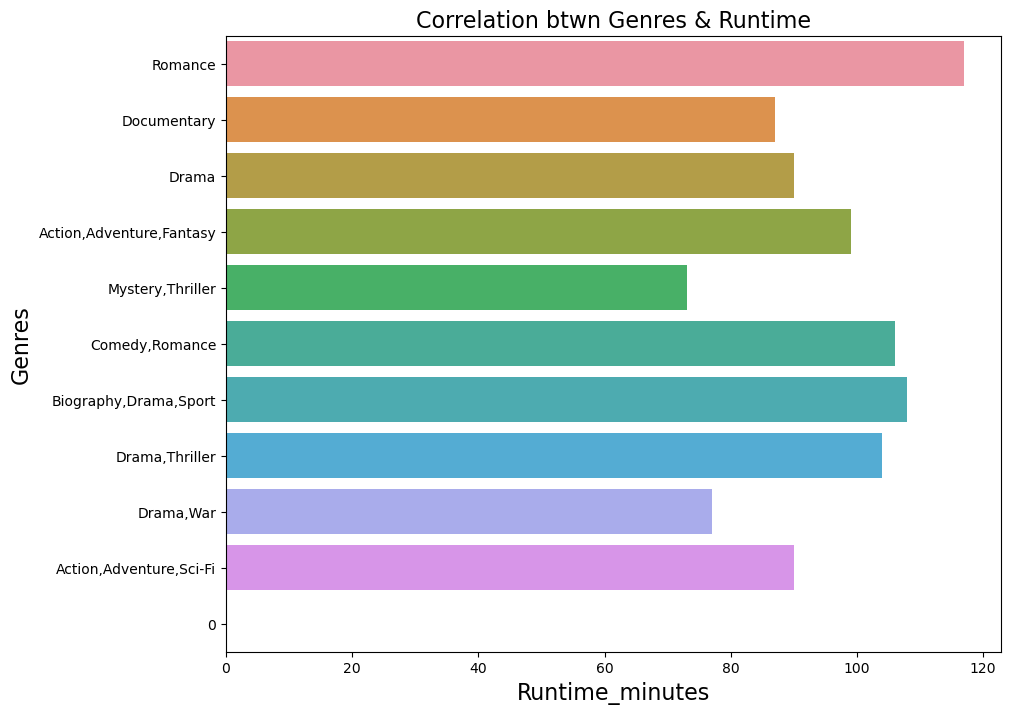

In [100]:
# plotting a sns.barplot:
fig, ax1= plt.subplots(figsize=(10,8))

x = list(budget_ratings_akas['runtime_minutes'].values)
y = budget_ratings['genres']

ax= sns.barplot(data = budget_ratings, x = 'runtime_minutes', y = 'genres')

#labelling plot
ax1.set_title('Correlation btwn Genres & Runtime', fontsize=16)
ax1.set_xlabel("Runtime_minutes",fontsize=16)
ax1.set_ylabel("Genres", fontsize=16)

#will display the plot
plt.show()

In [101]:
#loading data 
#confirming the columns needed are available
budget_ratings

,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010.0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama
3,Inception,WB,292600000.0,535700000,2010.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011.0,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0,0,0.0,0,0.0,78,"Dec 31, 2018",Red 11,7000,0,0,0,0.0,0.0,0,0,0.0,0.0,0
5778,0,0,0.0,0,0.0,79,"Apr 2, 1999",Following,6000,48482,240495,0,0.0,0.0,0,0,0.0,0.0,0
5779,0,0,0.0,0,0.0,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,0.0,0.0,0,0,0.0,0.0,0
5780,0,0,0.0,0,0.0,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,0.0,0.0,0,0,0.0,0.0,0


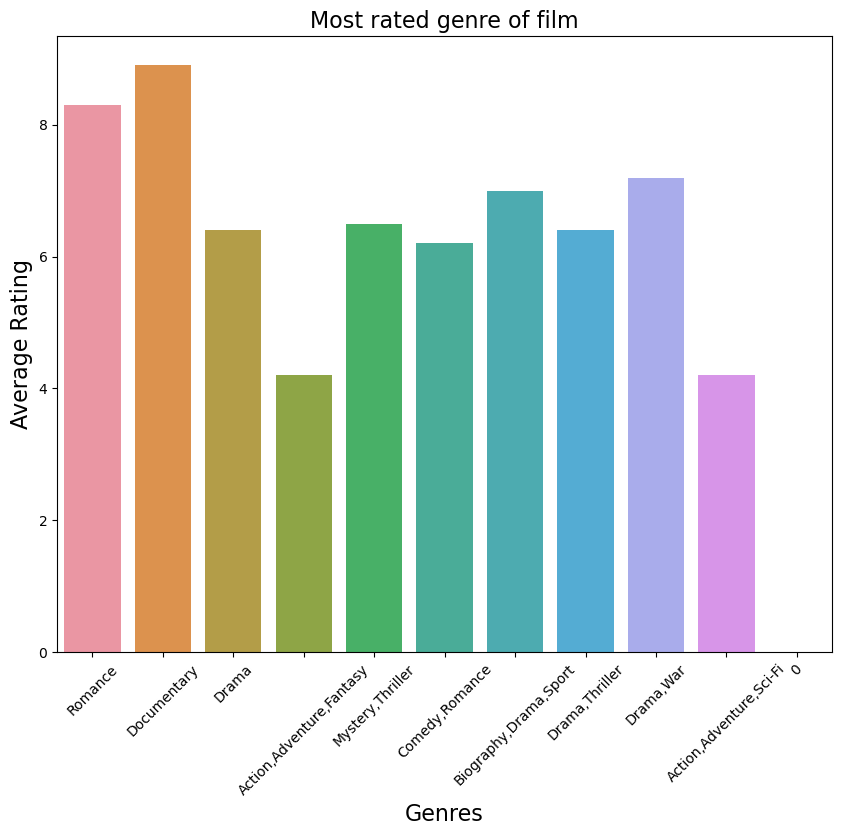

In [102]:
#plotting
fig, ax1= plt.subplots(figsize=(10,8))

x = list(budget_ratings_akas['genres'].values)
y = budget_ratings['averagerating']

ax= sns.barplot(data = budget_ratings, x = 'genres', y = 'averagerating')

#labelling plot
ax1.set_title('Most rated genre of film', fontsize=16)
ax1.set_xlabel("Genres",fontsize=16)
ax1.set_ylabel("Average Rating", fontsize=16)

#changing axis of x labels
plt.xticks(rotation = 45)

#will display the plot
plt.show()

In [103]:
#To enable it to load in the plot, convert worldwide gross to float.
budget_ratings['worldwide_gross']=budget_ratings['worldwide_gross'].astype(float)

In [104]:
#confirming changes
budget_ratings

,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010.0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama
3,Inception,WB,292600000.0,535700000,2010.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011.0,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0,0,0.0,0,0.0,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,0,0.0,0.0,0,0,0.0,0.0,0
5778,0,0,0.0,0,0.0,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,0,0.0,0.0,0,0,0.0,0.0,0
5779,0,0,0.0,0,0.0,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,0,0.0,0.0,0,0,0.0,0.0,0
5780,0,0,0.0,0,0.0,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,0,0.0,0.0,0,0,0.0,0.0,0


C:\Users\USER\anaconda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fi

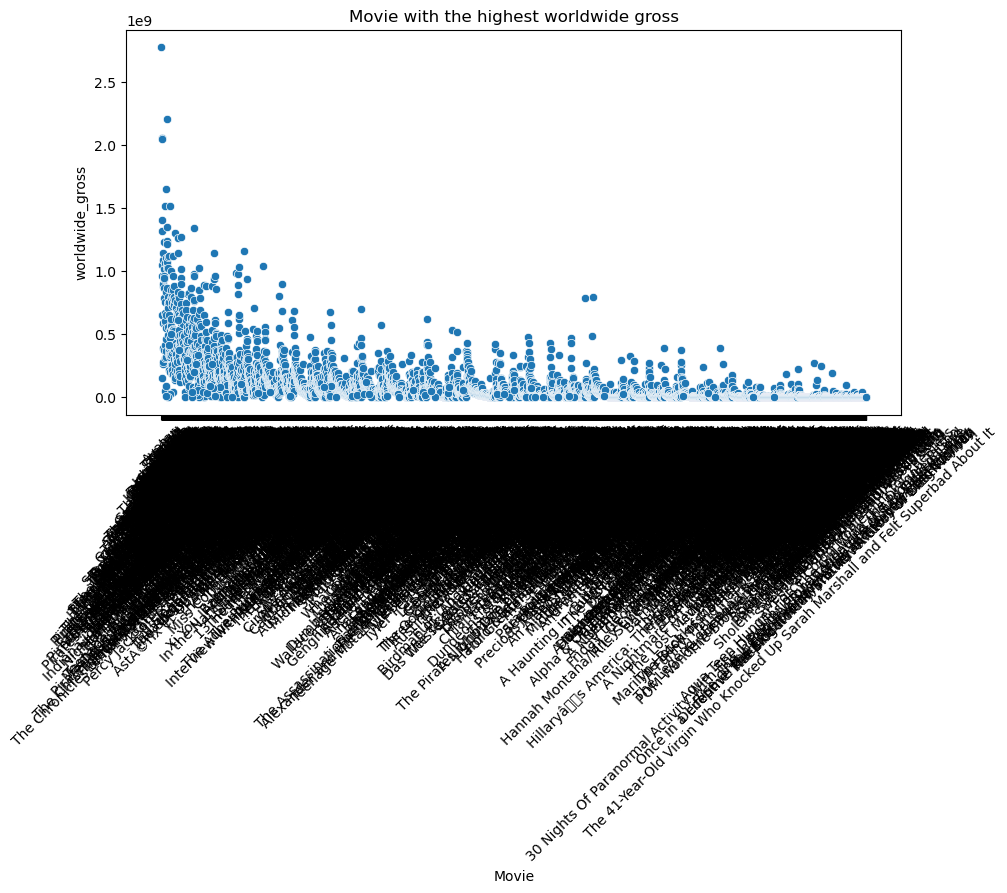

In [108]:
fig, ax1= plt.subplots(figsize=(10,5))

#arranging the x & y axis to avoid an overlap
x = np.arange(8)
y = 2*x + 1


#plot:
ax= sns.scatterplot( x='movie', y='worldwide_gross', data = budget_ratings)


#labelling plot
ax1.set_title('Movie with the highest worldwide gross')
ax1.set_xlabel("Movie")
ax1.set_ylabel("worldwide_gross")
plt.xticks(rotation= 45)
#will display the plot
plt.show()

In [106]:
#checking for the needed columns first
basics_and_ratings

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
5,tt1069246,6.2,326,Habana Eva,Habana Eva,2010,106.0,"Comedy,Romance"
6,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport"
7,tt1130982,6.4,571,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller"
8,tt1156528,7.2,265,Silent Sonata,Circus Fantasticus,2011,77.0,"Drama,War"
9,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi"


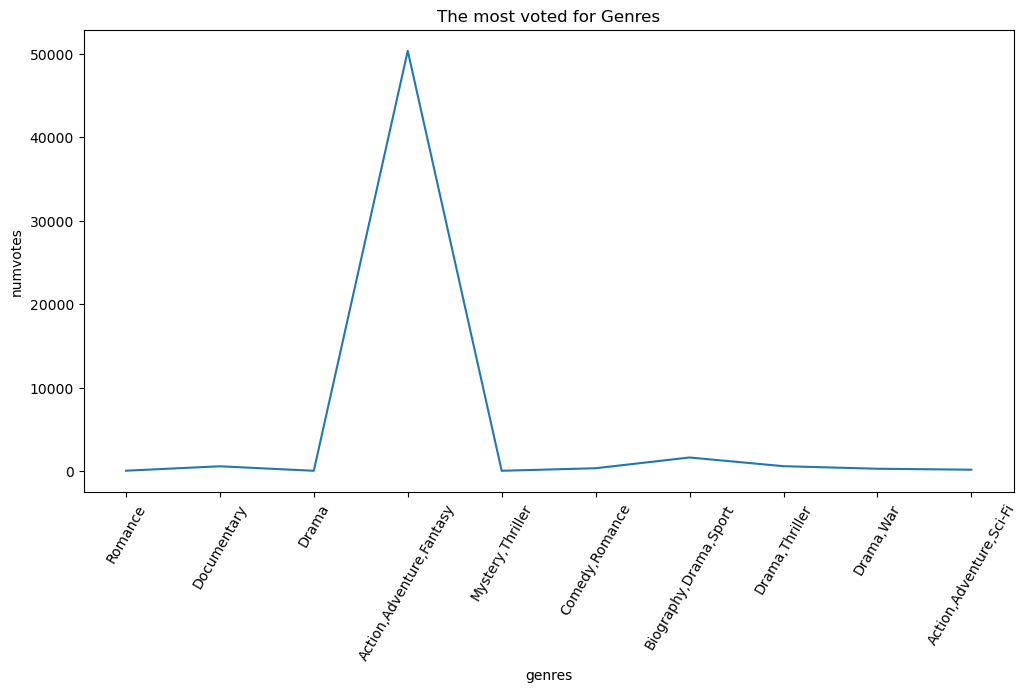

In [110]:
#Plotting a seaborn lineplot
plt.figure(figsize=(12,6)) 
sns.lineplot( x="genres", y="numvotes", data=basics_and_ratings,)  
plt.title("The most voted for Genres") #labelling
plt.xticks(rotation = 60);
plt.show() 